In [184]:
# Dependencies
import os
import pandas as pd
import gmaps
import requests
import json
import matplotlib.pyplot as plt
import numpy as np

# Google developer API key
from config import gkey

In [185]:
#Outline filepath for CSVs 
inspections = "Resources/inspections.csv"
violations = "Resources/violations.csv"
zip_codes = "Resources/us_zip_codes.csv"
real_estate = "Resources/rent_by_zip.csv"

#Read CSVs as pandas dataframes
inspections = pd.read_csv(inspections)
violations = pd.read_csv(violations)
zip_codes = pd.read_csv(zip_codes)
real_estate = pd.read_csv(real_estate)


In [186]:
# Drop unnecessary columns 
clean_df = inspections.drop(["serial_number","service_code","service_description","grade",
                             "program_status","pe_description", "employee_id","facility_state",
                             "record_id", "owner_name", "owner_id", "program_element_pe",
                             "program_name", "activity_date"],axis =1)

# Rename column labels
renamed_df = clean_df.rename(columns={  "activity_date":"Activity Date",
                                        "facility_name": "Facility Name",
                                        "score": "Score",
                                        "grade": "Grade",
                                        "facility_city": "City",
                                        "facility_id": "Facility ID",
                                        "facility_address": "Address",
                                        "facility_zip": "Zip Code",
                                        "program_status": "Status"})
renamed_df.head()

,Facility Name,Score,Address,City,Facility ID,Zip Code
0,HABITAT COFFEE SHOP,95,3708 N EAGLE ROCK BLVD,LOS ANGELES,FA0170465,90065
1,REILLY'S,92,100 WORLD WAY # 120,LOS ANGELES,FA0244690,90045
2,STREET CHURROS,93,6801 HOLLYWOOD BLVD # 253,LOS ANGELES,FA0224109,90028
3,RIO GENTLEMANS CLUB,93,13124 S FIGUEROA ST,LOS ANGELES,FA0046462,90064
4,LE PAIN QUOTIDIEN,93,13050 SAN VICENTE BLVD STE 114,LOS ANGELES,FA0034788,90049


In [219]:
zip_data = zip_data.dropna(how="any")
zip_data = renamed_df[["Score","Zip Code"]].groupby("Zip Code").mean()
zip_data.reset_index(inplace=True)
zip_data1 = zip_data.merge(real_estate, on="Zip Code", how = "left")
zip_data1.sort_values(by="Median Rent 2016",ascending=False).head()

,Zip Code,Score,Median Rent 2016
79,90272,94.166667,2738.71
70,90094,94.119048,2504.00
89,91326,98.000000,2497.36
67,90077,93.592593,2400.60
86,91307,99.000000,2341.20


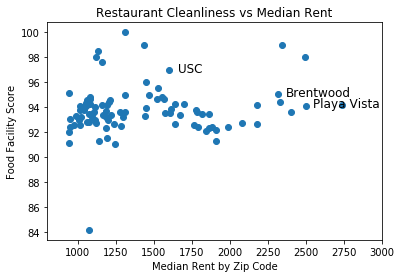

<Figure size 432x288 with 0 Axes>

In [242]:
plt.scatter(zip_data1["Median Rent 2016"],zip_data1["Score"],)
plt.title("Restaurant Cleanliness vs Median Rent")
plt.xlabel("Median Rent by Zip Code")
plt.ylabel("Food Facility Score")

usc_score = 96.8
med_rent = 1660
plt.text(x = med_rent, y = usc_score, s = "USC", fontsize = 12)

playa_score = 94
med_rent = 2550
plt.text(x = med_rent, y = playa_score, s = "Playa Vista", fontsize = 12)

brentwood_score = 94.9
med_rent = 2370
plt.text(x = med_rent, y = brentwood_score, s = "Brentwood", fontsize = 12)
plt.xlim(800,3000)


plt.show()
plt.savefig("restaurant_cleanliness_vs_median_rent_raw.png")

In [220]:
top_5_score = zip_data.nlargest(5, "Score")
top_5_score

,Zip Code,Score
50,90053,100.0
86,91307,99.0
92,91505,99.0
76,90222,98.5
73,90201,98.0


In [221]:
low_5_score = zip_data.nsmallest(5, "Score")
low_5_score

,Zip Code,Score
49,90052,84.166667
72,90103,90.333333
18,90020,91.051108
28,90030,91.111111
74,90211,91.285714


Text(0.5, 1.0, 'Highest Rent-Priced Neighborhoods vs. Number of Violations per Food Facility')

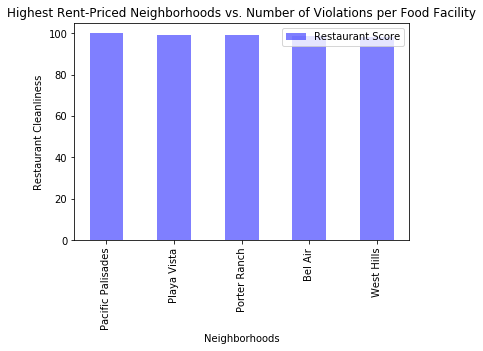

In [243]:
#Top Score Bar Graph
neighborhoods = ["Pacific Palisades", "Playa Vista", "Porter Ranch","Bel Air", "West Hills"]
ind = np.arange(len(neighborhoods))
score = top_5_score["Score"][0:5]
plt.bar(ind,score, width =.5, color="blue", alpha=0.5, align="center", label="Restaurant Score")

plt.xticks(ind, neighborhoods , rotation="vertical")

plt.ylabel("Restaurant Cleanliness")
plt.xlabel("Neighborhoods")

plt.legend(loc="upper right")
plt.title("Highest Rent-Priced Neighborhoods vs. Number of Violations per Food Facility")

In [ ]:
# Average Inspection score 
avg_score = renamed_df.loc[:,"Score"].mean()
avg_score 

In [ ]:
# Median inspection score
median_score = renamed_df.median()
median_score

In [237]:
# print unique zip codes 
unique_zip = merge_table["Zip Code"].unique()
unique_zip

array([90065, 90045, 90028, 90064, 90049, 90026, 90011, 90034, 90043,
       90047, 90020, 91604, 90027, 90006, 90024, 90023, 90067, 90019,
       90025, 90066, 90010, 90014, 90004, 90046, 90005, 90061, 90015,
       90048, 90035, 90057, 90016, 90062, 90017, 90039, 90037, 90042,
       90012, 90018, 90071, 90013, 90022, 90063, 90021, 90033, 90070,
       90036, 90230, 90291, 90068, 90031, 90041, 90008, 91367, 90059,
       90007, 90001, 90058, 90044, 90003, 90002, 90038, 90032, 91324,
       90069, 90029, 90211, 90089, 90077, 90056, 90040, 90054, 91325,
       91505, 90232, 90272, 90094, 90095, 90103, 90053, 92880, 91601,
       91326, 90292, 90052, 90921, 90220, 90723, 90293, 90079, 90030,
       91602, 90051, 91006, 90222, 91307, 91340, 90201])